In [1]:
import Modelos
import importlib
importlib.reload(Modelos)

<module 'Modelos' from 'g:\\My Drive\\Tesis\\Codigos\\Modelos.py'>

In [2]:
cantidadNodos = [2, 4, 6]
confiabilidadObjetivo = [0.02, 0.04, 0.06]
costos = [] # Lista para almacenar los costos asociados
tipoNodos = []

In [3]:
for nodos in cantidadNodos:
    for confiabilidad in confiabilidadObjetivo:
        model_base = Modelos.base_model(nodos) # Crear modelo base
        costo, variables = Modelos.serie_model(model_base, nodos, confiabilidad)# Ejecutar modelo en serie

        if variables is None:  # Cuando no hay solución
            print(f"No se encontró solución={nodos} y confiabilidad={confiabilidad}")
            costos.append((nodos, confiabilidad, None))
            tipoNodos.append({'Low': 0, 'Medium': 0, 'High': 0})  
            continue
        
        costos.append((nodos, confiabilidad, costo))# Almacenar resultados de costos

        # Procesar variables de decisión para obtener tipos de nodo
        tipoNodo = {'Low': 0, 'Medium': 0, 'High': 0}
        for var, value in variables.items():
            if var.startswith("x"):
                _, tipo = map(int, var.split('[')[1].split(']')[0].split(','))
                if tipo == 1:
                    tipoNodo['Low'] += int(value)
                elif tipo == 2:
                    tipoNodo['Medium'] += int(value)
                elif tipo == 3:
                    tipoNodo['High'] += int(value)
        tipoNodos.append(tipoNodo)

Restricted license - for non-production use only - expires 2026-11-23


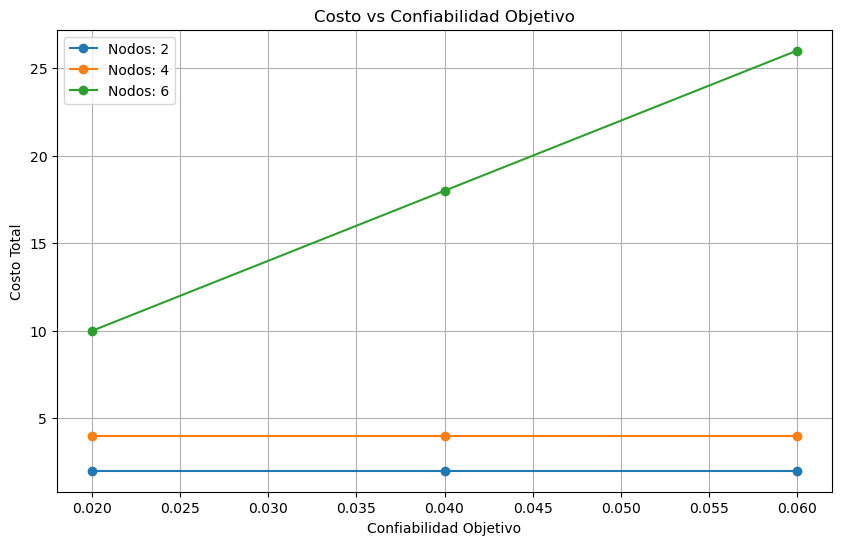

In [4]:
Modelos.grafico_costo_vs_confiabilidad_general(costos)

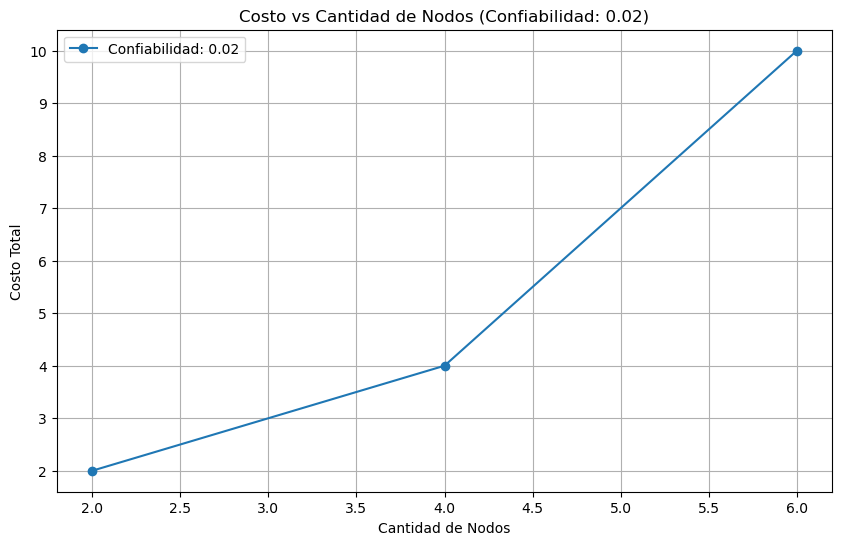

In [21]:
Modelos.grafico_costo_vs_cantidad_nodos_general(costos, confiabilidad_fija=0.02)

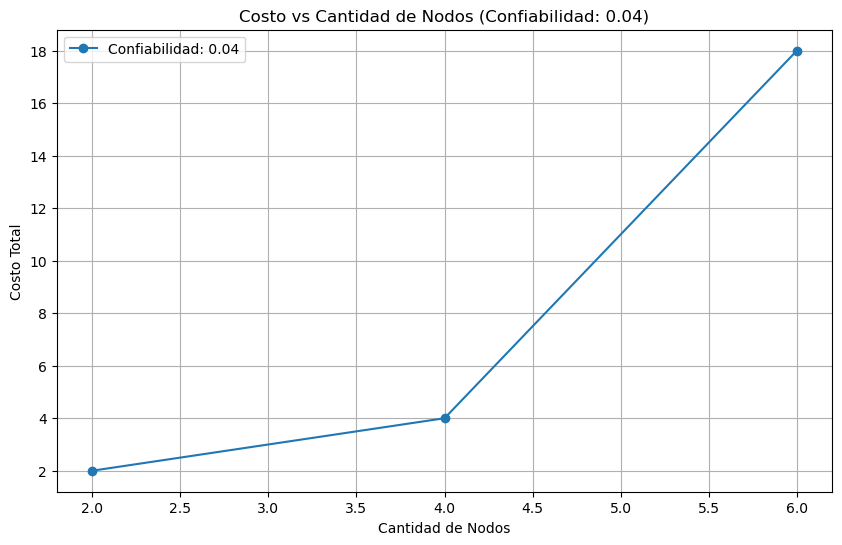

In [22]:
Modelos.grafico_costo_vs_cantidad_nodos_general(costos, confiabilidad_fija=0.04)

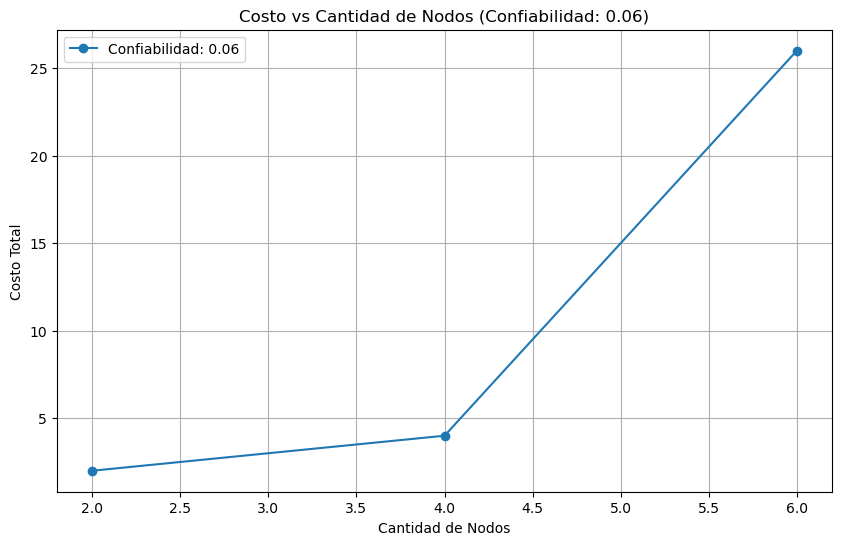

In [23]:
Modelos.grafico_costo_vs_cantidad_nodos_general(costos, confiabilidad_fija=0.06)

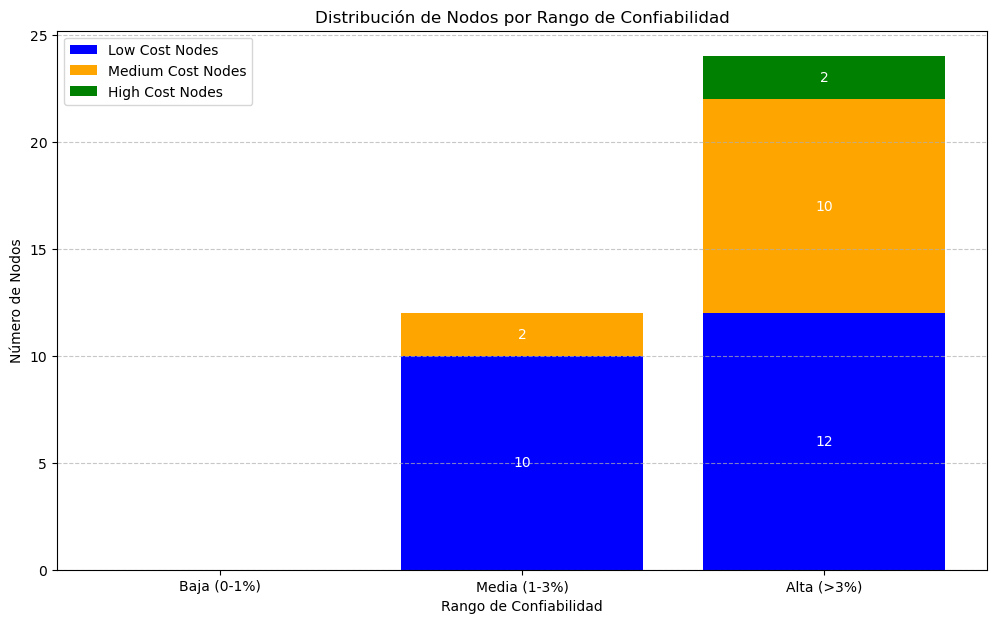

In [24]:
Modelos.grafico_barras_confiabilidad(costos, tipoNodos)